In [1]:
import os

BASE_PATH = "/kaggle/input/xca-classification-haryshwa/arcade"

SYNTAX_PATH = os.path.join(BASE_PATH, "syntax")
TRAIN_PATH = os.path.join(SYNTAX_PATH, "train")
VAL_PATH   = os.path.join(SYNTAX_PATH, "val")
TEST_PATH  = os.path.join(SYNTAX_PATH, "test")

print("Train:", os.listdir(TRAIN_PATH))
print("Val  :", os.listdir(VAL_PATH))
print("Test :", os.listdir(TEST_PATH))


Train: ['annotations', 'images']
Val  : ['annotations', 'images']
Test : ['annotations', 'images']


In [2]:
import json

ANNOT_PATH = os.path.join(TRAIN_PATH, "annotations", "train.json")

with open(ANNOT_PATH, "r") as f:
    coco_data = json.load(f)

print("Top-level keys:", coco_data.keys())


Top-level keys: dict_keys(['images', 'annotations', 'categories'])


In [3]:
categories = coco_data["categories"]

print("Number of anatomical classes:", len(categories))

for cat in categories[:10]:
    print(cat)


Number of anatomical classes: 26
{'id': 1, 'name': '1', 'supercategory': ''}
{'id': 2, 'name': '2', 'supercategory': ''}
{'id': 3, 'name': '3', 'supercategory': ''}
{'id': 4, 'name': '4', 'supercategory': ''}
{'id': 5, 'name': '5', 'supercategory': ''}
{'id': 6, 'name': '6', 'supercategory': ''}
{'id': 7, 'name': '7', 'supercategory': ''}
{'id': 8, 'name': '8', 'supercategory': ''}
{'id': 9, 'name': '9', 'supercategory': ''}
{'id': 10, 'name': '9a', 'supercategory': ''}


In [4]:
images = coco_data["images"]

print("Total training images:", len(images))
print(images[0])


Total training images: 1000
{'id': 922, 'width': 512, 'height': 512, 'file_name': '922.png', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}


In [5]:
annotations = coco_data["annotations"]

print("Total vessel instances:", len(annotations))
print(annotations[0])


Total vessel instances: 4976
{'id': 1, 'image_id': 922, 'category_id': 8, 'segmentation': [[382.0, 350.75, 380.25, 349.5, 378.75, 348.5, 377.5, 347.75, 376.0, 347.0, 374.5, 346.0, 373.0, 345.5, 371.5, 344.75, 370.25, 344.0, 368.75, 343.0, 367.5, 341.75, 366.75, 340.25, 366.5, 338.75, 366.25, 337.0, 366.0, 335.5, 366.0, 334.0, 366.0, 332.25, 366.25, 330.5, 366.75, 329.0, 366.75, 327.5, 367.0, 326.0, 367.25, 324.5, 367.25, 322.75, 367.25, 321.25, 367.25, 319.75, 366.75, 318.25, 366.25, 316.75, 366.0, 315.25, 365.25, 313.75, 364.25, 312.5, 362.75, 311.5, 361.25, 310.5, 359.75, 310.0, 358.25, 309.25, 357.0, 308.5, 355.5, 307.5, 354.25, 306.5, 352.75, 305.5, 351.5, 304.5, 351.0, 303.25, 350.75, 301.75, 351.0, 300.25, 351.5, 298.75, 352.25, 297.25, 353.0, 295.75, 356.25, 291.5, 358.75, 289.25, 361.75, 286.25, 363.75, 283.0, 365.5, 279.5, 365.25, 276.25, 364.75, 273.0, 362.75, 270.25, 361.0, 269.25, 357.75, 268.0, 354.0, 266.0, 350.75, 262.75, 349.0, 259.5, 348.25, 255.25, 348.25, 252.38, 348

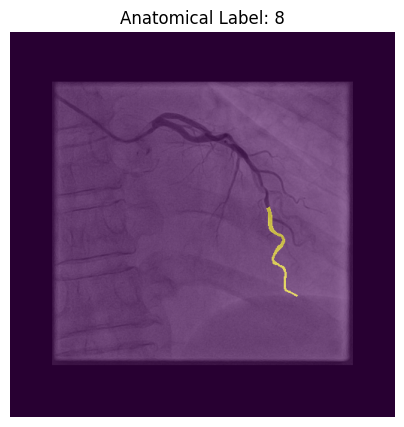

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Pick one annotation
ann = annotations[0]

# Get corresponding image info
img_info = next(img for img in images if img["id"] == ann["image_id"])
img_path = os.path.join(TRAIN_PATH, "images", img_info["file_name"])

# Load image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Create empty mask
mask = np.zeros(img.shape, dtype=np.uint8)

# Draw polygon
for seg in ann["segmentation"]:
    pts = np.array(seg).reshape(-1, 2).astype(np.int32)
    cv2.fillPoly(mask, [pts], 255)

# Get class name
cat_name = next(cat["name"] for cat in categories if cat["id"] == ann["category_id"])

# Plot
plt.figure(figsize=(5,5))
plt.imshow(img, cmap="gray")
plt.imshow(mask, alpha=0.6)
plt.title(f"Anatomical Label: {cat_name}")
plt.axis("off")
plt.show()


In [7]:
# Build category_id -> name mapping
id_to_name = {}

for cat in coco_data["categories"]:
    id_to_name[cat["id"]] = cat["name"]

# Print all mappings sorted by ID
for k in sorted(id_to_name.keys()):
    print(f"{k:>2}  ->  {id_to_name[k]}")


 1  ->  1
 2  ->  2
 3  ->  3
 4  ->  4
 5  ->  5
 6  ->  6
 7  ->  7
 8  ->  8
 9  ->  9
10  ->  9a
11  ->  10
12  ->  10a
13  ->  11
14  ->  12
15  ->  12a
16  ->  13
17  ->  14
18  ->  14a
19  ->  15
20  ->  16
21  ->  16a
22  ->  16b
23  ->  16c
24  ->  12b
25  ->  14b
26  ->  stenosis


In [8]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pick one image at random
img_info = random.choice(coco_data["images"])
img_id = img_info["id"]

print("Image ID:", img_id)
print("File:", img_info["file_name"])

# Get all annotations for this image
image_annotations = [
    ann for ann in coco_data["annotations"]
    if ann["image_id"] == img_id and ann["category_id"] != 26
]

print("Number of vessel instances:", len(image_annotations))


Image ID: 363
File: 363.png
Number of vessel instances: 3


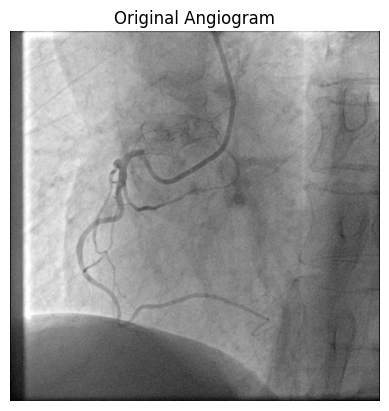

In [9]:
img_path = os.path.join(TRAIN_PATH, "images", img_info["file_name"])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Original Angiogram")
plt.axis("off")
plt.show()


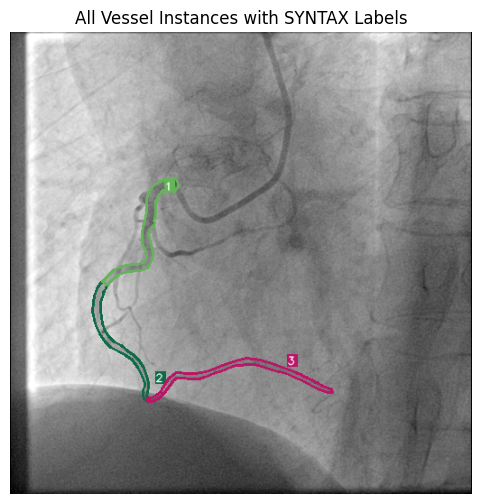

In [10]:
# Convert grayscale to color so we can overlay colors
canvas = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

def get_contrasting_text_color(bg_color):
    """
    bg_color: (B, G, R)
    Returns (255,255,255) or (0,0,0)
    """
    brightness = 0.299 * bg_color[2] + 0.587 * bg_color[1] + 0.114 * bg_color[0]
    return (0, 0, 0) if brightness > 160 else (255, 255, 255)

# Random but consistent color per class
np.random.seed(42)
class_colors = {
    cid: tuple(np.random.randint(0, 255, 3).tolist())
    for cid in id_to_name.keys()
}

for ann in image_annotations:
    class_id = ann["category_id"]
    class_name = id_to_name[class_id]
    color = class_colors[class_id]
    text_color = get_contrasting_text_color(color)

    for seg in ann["segmentation"]:
        pts = np.array(seg).reshape(-1, 2).astype(np.int32)

        # Draw vessel
        cv2.polylines(canvas, [pts], isClosed=False, color=color, thickness=2)

        # Label position (middle of vessel, offset)
        x, y = pts[len(pts) // 2]
        label_pos = (int(x + 8), int(y - 8))

        # Text size
        (tw, th), _ = cv2.getTextSize(
            class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1
        )

        # Background rectangle
        cv2.rectangle(
            canvas,
            (label_pos[0], label_pos[1] - th - 2),
            (label_pos[0] + tw + 2, label_pos[1] + 2),
            color,
            -1
        )

        # Draw text
        cv2.putText(
            canvas,
            class_name,
            label_pos,
            cv2.FONT_HERSHEY_SIMPLEX,
            0.4,
            text_color,
            1,
            cv2.LINE_AA
        )

plt.figure(figsize=(6, 6))
plt.imshow(canvas)
plt.title("All Vessel Instances with SYNTAX Labels")
plt.axis("off")
plt.show()


In [11]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Input / Output paths
INPUT_IMG_DIR = os.path.join(TRAIN_PATH, "images")
OUTPUT_IMG_DIR = "/kaggle/working/preprocessed_syntax/train/images"
os.makedirs(OUTPUT_IMG_DIR, exist_ok=True)

def preprocess_vessel_image(img):
    # White Top-Hat (paper-accurate)
    kernel = np.ones((50, 50), np.uint8)
    top_hat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

    # CLAHE (paper-accurate)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(top_hat)
    return enhanced

# Batch preprocess
for img_name in tqdm(os.listdir(INPUT_IMG_DIR)):
    if not img_name.lower().endswith(".png"):
        continue

    in_path = os.path.join(INPUT_IMG_DIR, img_name)
    out_path = os.path.join(OUTPUT_IMG_DIR, img_name)

    img = cv2.imread(in_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    processed = preprocess_vessel_image(img)
    cv2.imwrite(out_path, processed)

print("✅ TRAIN preprocessing done.")


100%|██████████| 1000/1000 [00:19<00:00, 51.77it/s]

✅ TRAIN preprocessing done.


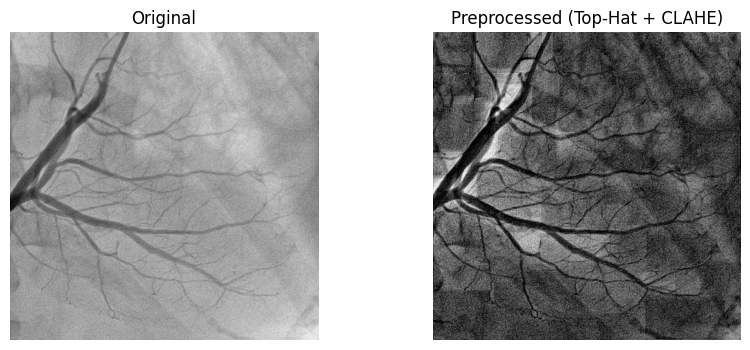

In [12]:
import random
import matplotlib.pyplot as plt

# Pick random image
sample_img = random.choice(os.listdir(INPUT_IMG_DIR))

orig = cv2.imread(os.path.join(INPUT_IMG_DIR, sample_img), cv2.IMREAD_GRAYSCALE)
prep = cv2.imread(os.path.join(OUTPUT_IMG_DIR, sample_img), cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(orig, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(prep, cmap="gray")
plt.title("Preprocessed (Top-Hat + CLAHE)")
plt.axis("off")

plt.show()


In [13]:
import json
import os
import numpy as np
from tqdm import tqdm

# Paths
COCO_JSON = os.path.join(TRAIN_PATH, "annotations", "train.json")
YOLO_LABEL_DIR = "/kaggle/working/preprocessed_syntax/train/labels"

# Force-create label directory
os.makedirs(YOLO_LABEL_DIR, exist_ok=True)

# Load COCO
with open(COCO_JSON, "r") as f:
    coco = json.load(f)

images = {img["id"]: img for img in coco["images"]}

# Valid SYNTAX categories (exclude stenosis = 26)
valid_categories = sorted(
    [cat["id"] for cat in coco["categories"] if cat["id"] != 26]
)

# Map COCO category_id -> YOLO class_id (0-based)
cat_id_to_yolo = {cid: i for i, cid in enumerate(valid_categories)}

# Group annotations by image
ann_by_image = {}
for ann in coco["annotations"]:
    if ann["category_id"] == 26:
        continue
    ann_by_image.setdefault(ann["image_id"], []).append(ann)

written_files = 0

# Convert annotations
for image_id, anns in tqdm(ann_by_image.items()):
    img_info = images[image_id]
    w, h = img_info["width"], img_info["height"]
    img_name = os.path.splitext(img_info["file_name"])[0]

    label_path = os.path.join(YOLO_LABEL_DIR, img_name + ".txt")

    with open(label_path, "w") as f:
        for ann in anns:
            yolo_class = cat_id_to_yolo[ann["category_id"]]

            for seg in ann["segmentation"]:
                seg = np.array(seg).reshape(-1, 2)
                seg[:, 0] /= w
                seg[:, 1] /= h
                seg = seg.flatten()

                line = str(yolo_class) + " " + " ".join(f"{x:.6f}" for x in seg)
                f.write(line + "\n")

    written_files += 1

print(f"✅ YOLO labels written: {written_files}")
print("📂 Label directory:", YOLO_LABEL_DIR)


100%|██████████| 1000/1000 [00:00<00:00, 1621.20it/s]

✅ YOLO labels written: 1000
📂 Label directory: /kaggle/working/preprocessed_syntax/train/labels


In [14]:
import yaml
import os

# Where YOLO will read data from
DATA_YAML_PATH = "/kaggle/working/preprocessed_syntax/data.yaml"

# YOLO class names in EXACT order (category_id sorted, excluding 26)
# This order must match cat_id_to_yolo mapping used during conversion
class_names = [
    "1", "2", "3", "4", "5", "6", "7", "8", "9",
    "9a", "10", "10a", "11", "12", "12a", "13",
    "14", "14a", "15", "16", "16a", "16b", "16c",
    "12b", "14b"
]

data_yaml = {
    "path": "/kaggle/working/preprocessed_syntax",
    "train": "train/images",
    "val": "train/images",   # TEMP: reuse train as val for now
    "nc": len(class_names),
    "names": class_names
}

with open(DATA_YAML_PATH, "w") as f:
    yaml.dump(data_yaml, f, sort_keys=False)

print("✅ data.yaml created at:", DATA_YAML_PATH)
print("Number of classes:", len(class_names))


✅ data.yaml created at: /kaggle/working/preprocessed_syntax/data.yaml
Number of classes: 25


In [15]:
# Install Ultralytics (YOLOv8)
!pip install -q ultralytics

from ultralytics import YOLO

# Load a small YOLOv8 segmentation model (good for first run)
model = YOLO("yolov8n-seg.pt")

# Train (dry run)
model.train(
    data="/kaggle/working/preprocessed_syntax/data.yaml",
    epochs=5,              # small number just to verify pipeline
    imgsz=512,
    batch=4,
    device=0,              # GPU
    workers=2,
    project="syntax_yolo",
    name="dry_run"
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/preprocessed_syntax/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=Non

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f766ceb6480>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.03


image 1/1 /kaggle/working/preprocessed_syntax/train/images/126.png: 512x512 1 11, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 11.8ms postprocess per image at shape (1, 3, 512, 512)


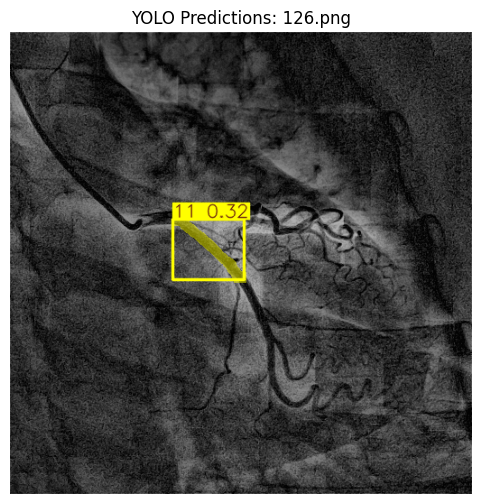

In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# Load trained model from dry run
model = YOLO("/kaggle/working/syntax_yolo/dry_run/weights/best.pt")

# Pick a random preprocessed image
IMG_DIR = "/kaggle/working/preprocessed_syntax/train/images"
img_name = random.choice(os.listdir(IMG_DIR))
img_path = os.path.join(IMG_DIR, img_name)

# Run inference
results = model(img_path, conf=0.25)

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot predictions
plt.figure(figsize=(6,6))
plt.imshow(results[0].plot())
plt.title(f"YOLO Predictions: {img_name}")
plt.axis("off")
plt.show()


In [17]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")

model.train(
    data="/kaggle/working/preprocessed_syntax/data.yaml",
    epochs=20,
    imgsz=512,
    batch=4,
    device=0,
    workers=2,
    project="syntax_yolo",
    name="run_20ep",
    save=True
)


Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/preprocessed_syntax/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run_20ep, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f76e8b54470>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.03


image 1/1 /kaggle/working/preprocessed_syntax/train/images/23.png: 512x512 1 3, 1 4, 1 16, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 512)


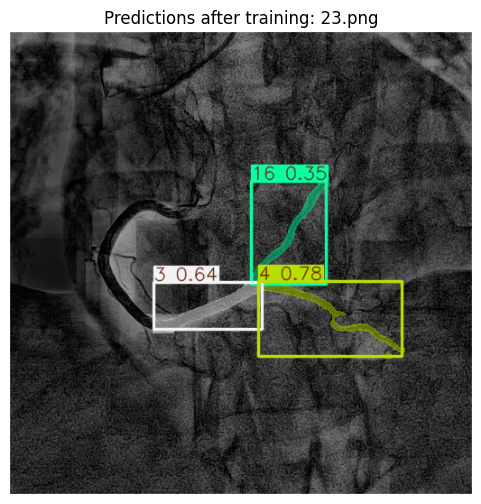

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO("/kaggle/working/syntax_yolo/run_20ep/weights/best.pt")

# Pick a random preprocessed training image
IMG_DIR = "/kaggle/working/preprocessed_syntax/train/images"
img_name = random.choice(os.listdir(IMG_DIR))
img_path = os.path.join(IMG_DIR, img_name)

# Run inference
results = model(img_path, conf=0.25)

# Show predictions
plt.figure(figsize=(6, 6))
plt.imshow(results[0].plot())
plt.title(f"Predictions after training: {img_name}")
plt.axis("off")
plt.show()



image 1/1 /kaggle/working/preprocessed_syntax/train/images/950.png: 512x512 2 5s, 1 6, 3 7s, 1 8, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)


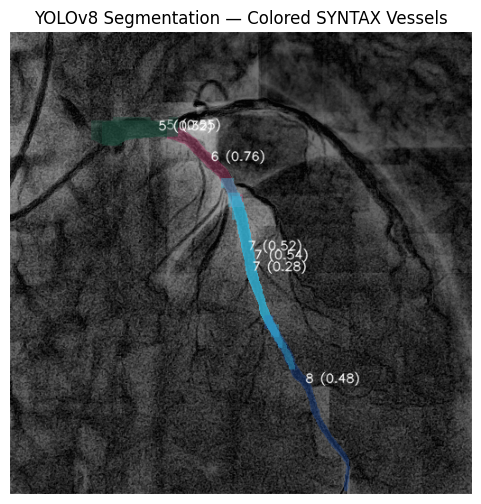

In [19]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# YOLO class_id → SYNTAX name
yolo_id_to_syntax = {
    0: "1", 1: "2", 2: "3", 3: "4", 4: "5",
    5: "6", 6: "7", 7: "8", 8: "9", 9: "9a",
    10: "10", 11: "10a", 12: "11", 13: "12", 14: "12a",
    15: "13", 16: "14", 17: "14a", 18: "15", 19: "16",
    20: "16a", 21: "16b", 22: "16c", 23: "12b", 24: "14b"
}

# Load model
model = YOLO("/kaggle/working/syntax_yolo/run_20ep/weights/best.pt")

# Pick image
IMG_DIR = "/kaggle/working/preprocessed_syntax/train/images"
img_name = random.choice(os.listdir(IMG_DIR))
img_path = os.path.join(IMG_DIR, img_name)

# Inference
results = model(img_path, conf=0.25)[0]

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

overlay = img.copy()

# Random but consistent colors per class
np.random.seed(0)
class_colors = {
    i: tuple(np.random.randint(0, 255, 3).tolist())
    for i in yolo_id_to_syntax.keys()
}

# Draw masks
if results.masks is not None:
    for mask, cls, conf in zip(
        results.masks.data.cpu().numpy(),
        results.boxes.cls.cpu().numpy(),
        results.boxes.conf.cpu().numpy()
    ):
        cls = int(cls)
        color = class_colors[cls]
        syntax = yolo_id_to_syntax[cls]

        mask = mask.astype(bool)

        # Color the vessel
        overlay[mask] = (
            0.6 * overlay[mask] + 0.4 * np.array(color)
        ).astype(np.uint8)

        # Label position
        ys, xs = np.where(mask)
        if len(xs) > 0:
            x, y = xs[len(xs)//2], ys[len(ys)//2]
            cv2.putText(
                overlay,
                f"{syntax} ({conf:.2f})",
                (x, y),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.45,
                (255, 255, 255),
                1,
                cv2.LINE_AA
            )

plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.title("YOLOv8 Segmentation — Colored SYNTAX Vessels")
plt.axis("off")
plt.show()


In [20]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Input / Output paths
VAL_IMG_DIR = os.path.join(VAL_PATH, "images")
OUT_VAL_IMG_DIR = "/kaggle/working/preprocessed_syntax/val/images"
os.makedirs(OUT_VAL_IMG_DIR, exist_ok=True)

def preprocess_vessel_image(img):
    # White Top-Hat (paper-accurate)
    kernel = np.ones((50, 50), np.uint8)
    top_hat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

    # CLAHE (paper-accurate)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(top_hat)
    return enhanced

# Batch preprocess validation images
count = 0
for img_name in tqdm(os.listdir(VAL_IMG_DIR)):
    if not img_name.lower().endswith(".png"):
        continue

    in_path = os.path.join(VAL_IMG_DIR, img_name)
    out_path = os.path.join(OUT_VAL_IMG_DIR, img_name)

    img = cv2.imread(in_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    processed = preprocess_vessel_image(img)
    cv2.imwrite(out_path, processed)
    count += 1

print(f"✅ VAL preprocessing done. Images processed: {count}")


100%|██████████| 200/200 [00:03<00:00, 54.00it/s]

✅ VAL preprocessing done. Images processed: 200


In [21]:
import json
import os
import numpy as np
from tqdm import tqdm

# Paths
COCO_VAL_JSON = os.path.join(VAL_PATH, "annotations", "val.json")
YOLO_VAL_LABEL_DIR = "/kaggle/working/preprocessed_syntax/val/labels"
os.makedirs(YOLO_VAL_LABEL_DIR, exist_ok=True)

# Load COCO val annotations
with open(COCO_VAL_JSON, "r") as f:
    coco = json.load(f)

images = {img["id"]: img for img in coco["images"]}

# Valid SYNTAX categories (exclude stenosis = 26)
valid_categories = sorted(
    [cat["id"] for cat in coco["categories"] if cat["id"] != 26]
)

# COCO category_id -> YOLO class_id (0-based)
cat_id_to_yolo = {cid: i for i, cid in enumerate(valid_categories)}

# Group annotations by image
ann_by_image = {}
for ann in coco["annotations"]:
    if ann["category_id"] == 26:
        continue
    ann_by_image.setdefault(ann["image_id"], []).append(ann)

written = 0

# Convert annotations
for image_id, anns in tqdm(ann_by_image.items()):
    img_info = images[image_id]
    w, h = img_info["width"], img_info["height"]
    img_name = os.path.splitext(img_info["file_name"])[0]
    label_path = os.path.join(YOLO_VAL_LABEL_DIR, img_name + ".txt")

    with open(label_path, "w") as f:
        for ann in anns:
            yolo_class = cat_id_to_yolo[ann["category_id"]]
            for seg in ann["segmentation"]:
                seg = np.array(seg).reshape(-1, 2)
                seg[:, 0] /= w
                seg[:, 1] /= h
                seg = seg.flatten()

                line = str(yolo_class) + " " + " ".join(f"{x:.6f}" for x in seg)
                f.write(line + "\n")

    written += 1

print(f"✅ VAL YOLO labels written: {written}")
print("📂 Label directory:", YOLO_VAL_LABEL_DIR)


100%|██████████| 200/200 [00:00<00:00, 1471.71it/s]

✅ VAL YOLO labels written: 200
📂 Label directory: /kaggle/working/preprocessed_syntax/val/labels


In [22]:
import yaml

DATA_YAML_PATH = "/kaggle/working/preprocessed_syntax/data.yaml"

class_names = [
    "1", "2", "3", "4", "5", "6", "7", "8", "9",
    "9a", "10", "10a", "11", "12", "12a", "13",
    "14", "14a", "15", "16", "16a", "16b", "16c",
    "12b", "14b"
]

data_yaml = {
    "path": "/kaggle/working/preprocessed_syntax",
    "train": "train/images",
    "val": "val/images",
    "nc": len(class_names),
    "names": class_names
}

with open(DATA_YAML_PATH, "w") as f:
    yaml.dump(data_yaml, f, sort_keys=False)

print("✅ data.yaml updated for REAL validation")
print("Train images:", data_yaml["train"])
print("Val images:", data_yaml["val"])


✅ data.yaml updated for REAL validation
Train images: train/images
Val images: val/images


In [23]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/kaggle/working/syntax_yolo/run_20ep/weights/best.pt")

# Run validation on REAL val set
metrics = model.val(
    data="/kaggle/working/preprocessed_syntax/data.yaml",
    imgsz=512,
    batch=4,
    device=0
)

print("✅ Validation complete")


Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,262,939 parameters, 0 gradients, 11.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2559.4±795.7 MB/s, size: 168.3 KB)
val: Scanning /kaggle/working/preprocessed_syntax/val/labels... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 574.4it/s 0.3s
val: New cache created: /kaggle/working/preprocessed_syntax/val/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 50/50 19.3it/s 2.6s
                   all        200       1168       0.49      0.335      0.345      0.164      0.499      0.348      0.365      0.148
                     1         66         66      0.571      0.647      0.595       0.24      0.691       0.78      0.771      0.353
                     2         66         66      0.432        0.5      0.453      0.16

In [24]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Input / Output paths
TEST_IMG_DIR = os.path.join(TEST_PATH, "images")
OUT_TEST_IMG_DIR = "/kaggle/working/preprocessed_syntax/test/images"
os.makedirs(OUT_TEST_IMG_DIR, exist_ok=True)

def preprocess_vessel_image(img):
    # White Top-Hat (paper-accurate)
    kernel = np.ones((50, 50), np.uint8)
    top_hat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

    # CLAHE (paper-accurate)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(top_hat)
    return enhanced

count = 0
for img_name in tqdm(os.listdir(TEST_IMG_DIR)):
    if not img_name.lower().endswith(".png"):
        continue

    in_path = os.path.join(TEST_IMG_DIR, img_name)
    out_path = os.path.join(OUT_TEST_IMG_DIR, img_name)

    img = cv2.imread(in_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    processed = preprocess_vessel_image(img)
    cv2.imwrite(out_path, processed)
    count += 1

print(f"✅ TEST preprocessing done. Images processed: {count}")


100%|██████████| 300/300 [00:05<00:00, 56.17it/s]

✅ TEST preprocessing done. Images processed: 300



image 1/1 /kaggle/working/preprocessed_syntax/test/images/271.png: 512x512 2 1s, 4 2s, 1 3, 1 4, 2 16s, 7.9ms
Speed: 1.0ms preprocess, 7.9ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)


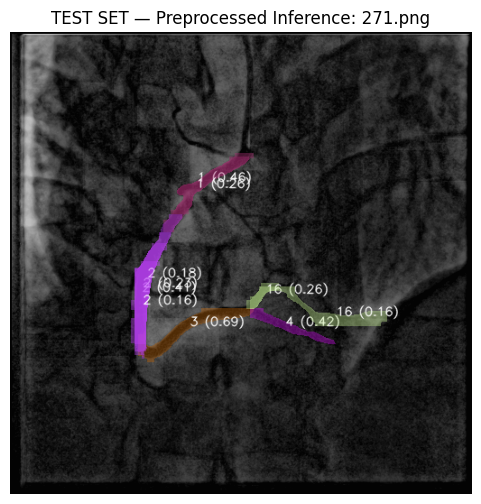

In [25]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# YOLO class_id → SYNTAX name
yolo_id_to_syntax = {
    0: "1", 1: "2", 2: "3", 3: "4", 4: "5",
    5: "6", 6: "7", 7: "8", 8: "9", 9: "9a",
    10: "10", 11: "10a", 12: "11", 13: "12", 14: "12a",
    15: "13", 16: "14", 17: "14a", 18: "15", 19: "16",
    20: "16a", 21: "16b", 22: "16c", 23: "12b", 24: "14b"
}

# Load trained model
model = YOLO("/kaggle/working/syntax_yolo/run_20ep/weights/best.pt")

# PREPROCESSED test images
TEST_IMG_DIR = "/kaggle/working/preprocessed_syntax/test/images"

# Pick random test image
img_name = random.choice(os.listdir(TEST_IMG_DIR))
img_path = os.path.join(TEST_IMG_DIR, img_name)

# Run inference (lower conf for test)
results = model(img_path, conf=0.15)[0]

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

overlay = img.copy()

# Consistent colors
np.random.seed(0)
class_colors = {
    i: tuple(np.random.randint(0, 255, 3).tolist())
    for i in yolo_id_to_syntax.keys()
}

# Draw segmentation masks
if results.masks is not None:
    for mask, cls, conf in zip(
        results.masks.data.cpu().numpy(),
        results.boxes.cls.cpu().numpy(),
        results.boxes.conf.cpu().numpy()
    ):
        cls = int(cls)
        syntax = yolo_id_to_syntax[cls]
        color = class_colors[cls]

        mask = mask.astype(bool)
        overlay[mask] = (
            0.6 * overlay[mask] + 0.4 * np.array(color)
        ).astype(np.uint8)

        ys, xs = np.where(mask)
        if len(xs) > 0:
            x, y = xs[len(xs)//2], ys[len(ys)//2]
            cv2.putText(
                overlay,
                f"{syntax} ({conf:.2f})",
                (x, y),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.45,
                (255, 255, 255),
                1,
                cv2.LINE_AA
            )

plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.title(f"TEST SET — Preprocessed Inference: {img_name}")
plt.axis("off")
plt.show()
